In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df = df.drop(df.columns[0], axis=1)

In [8]:
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [9]:
df.shape

(300153, 11)

In [10]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

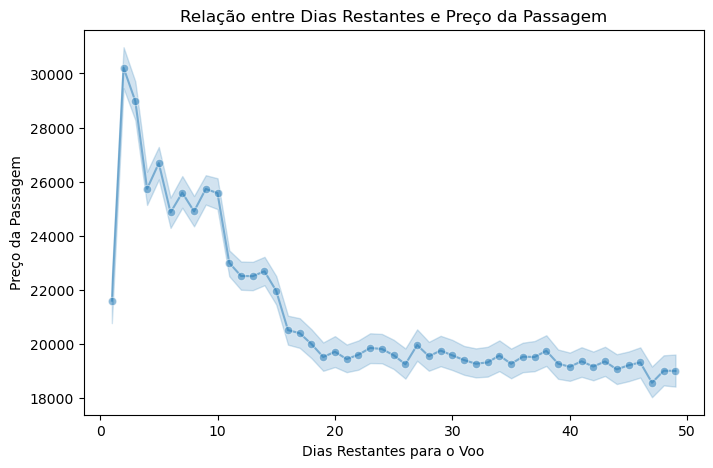

In [12]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x="days_left", y="price", marker='o',alpha=0.5)
plt.xlabel("Dias Restantes para o Voo")
plt.ylabel("Preço da Passagem")
plt.title("Relação entre Dias Restantes e Preço da Passagem")
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder = LabelEncoder()
df['airline'] = label_encoder.fit_transform(df['airline'])
df['flight'] = label_encoder.fit_transform(df['flight'])
df['source_city'] = label_encoder.fit_transform(df['source_city'])
df['departure_time'] = label_encoder.fit_transform(df['departure_time'])
df['stops'] = label_encoder.fit_transform(df['stops'])
df['arrival_time'] = label_encoder.fit_transform(df['arrival_time'])
df['destination_city'] = label_encoder.fit_transform(df['destination_city'])
df['class'] = label_encoder.fit_transform(df['class'])

In [23]:
df.dtypes

airline               int32
flight                int32
source_city           int32
departure_time        int32
stops                 int32
arrival_time          int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
price                 int64
dtype: object

In [25]:
# Análise de normalidade
from scipy.stats import shapiro

for column in df.columns:
        stat, p_value = shapiro(df[column])
        if p_value > 0.05:
            print(f"A variável '{column}' segue uma distribuição normal.")
        else:
            print(f"A variável '{column}' NÃO segue uma distribuição normal.")

A variável 'airline' NÃO segue uma distribuição normal.
A variável 'flight' NÃO segue uma distribuição normal.
A variável 'source_city' NÃO segue uma distribuição normal.
A variável 'departure_time' NÃO segue uma distribuição normal.
A variável 'stops' NÃO segue uma distribuição normal.
A variável 'arrival_time' NÃO segue uma distribuição normal.
A variável 'destination_city' NÃO segue uma distribuição normal.
A variável 'class' NÃO segue uma distribuição normal.
A variável 'duration' NÃO segue uma distribuição normal.
A variável 'days_left' NÃO segue uma distribuição normal.
A variável 'price' NÃO segue uma distribuição normal.


In [27]:
#Analisando correlação de variáveis previsoras com alvo
correlacao = df.corr(method='spearman')
print(correlacao)
# Decisão por não usar regressão linear, correlações lineares baixas entrem variáveis independentes com a
# variável dependente

                   airline    flight  source_city  departure_time     stops  \
airline           1.000000  0.703415    -0.027352        0.054218 -0.038912   
flight            0.703415  1.000000     0.026231        0.075946 -0.096261   
source_city      -0.027352  0.026231     1.000000       -0.009033  0.001951   
departure_time    0.054218  0.075946    -0.009033        1.000000 -0.013726   
stops            -0.038912 -0.096261     0.001951       -0.013726  1.000000   
arrival_time      0.035537  0.045915     0.043531       -0.056725  0.012746   
destination_city -0.029887 -0.062036    -0.223479        0.000803 -0.019260   
class            -0.187568 -0.252726    -0.000328       -0.056203  0.114955   
duration          0.014594  0.195093     0.007363        0.117835 -0.471051   
days_left        -0.009361 -0.001147    -0.003548       -0.002465 -0.010146   
price             0.289794  0.319330     0.014802        0.054761 -0.233227   

                  arrival_time  destination_city   

In [29]:
previsores = df.iloc[:, 0:10]
alvo = df.iloc[:,10]

In [31]:
previsores.shape

(300153, 10)

In [33]:
alvo.shape

(300153,)

In [35]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, alvo, test_size = 0.3, random_state = 48)

# Teste de algorítmos de regressão

### Árvore de decisão

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
arvore = DecisionTreeRegressor(max_depth = 20, random_state=10)

In [118]:
arvore.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=20, random_state=10)

In [119]:
arvore.score(x_treino, y_treino)

0.9972729720827594

In [122]:
arvore.score(x_teste, y_teste)

0.9835980086769373

In [124]:
previsoes_arvore = arvore.predict(x_teste)

In [126]:
mean_absolute_error(y_teste, previsoes_arvore)

1035.1256818264287

In [128]:
mean_squared_error(y_teste, previsoes_arvore)

8462819.277407393

In [130]:
np.sqrt(mean_squared_error(y_teste, previsoes_arvore))

2909.0925178494053

In [209]:
# Fazendo validação cruzada
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f" Score médio:{cross_val_score(arvore, previsores, alvo, cv=kf, scoring='r2').mean() * 100:.2f}%")

 Score médio:98.42%


### Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
random = RandomForestRegressor(max_depth = 15, n_estimators = 100, criterion = 'squared_error', random_state=5)
random.fit(x_treino,y_treino)

RandomForestRegressor(max_depth=15, random_state=5)

In [179]:
random.score(x_treino,y_treino)

0.9904162834868253

In [180]:
random.score(x_teste,y_teste)

0.9863108699931646

In [181]:
previsores_random = random.predict(x_teste)

In [182]:
np.sqrt(mean_squared_error(y_teste, previsores_random))

2657.6462219350024

In [212]:
print(f" Score médio:{cross_val_score(random, previsores, alvo, cv=kf, scoring='r2').mean() * 100:.2f}%")

 Score médio:98.64%


## XGBoost

In [219]:
!pip install xgboost

In [221]:
from xgboost import XGBRegressor

In [232]:
xgboost = XGBRegressor(n_estimators = 100, max_depth=15, learning_rate= 0.05, objective = 'reg:squarederror')
xgboost.fit(x_treino,y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [234]:
xgboost.score(x_treino,y_treino)

0.9959278702735901

In [236]:
xgboost.score(x_teste,y_teste)

0.9898536205291748

In [241]:
previsoes_xg = xgboost.predict(x_teste)

In [245]:
np.sqrt(mean_squared_error(y_teste, previsoes_xg))

2288.049123162199

In [247]:
print(f" Score médio:{cross_val_score(xgboost, previsores, alvo, cv=kf, scoring='r2').mean() * 100:.2f}%")

 Score médio:99.05%


## Precisões dos modelos

#### Decision Tree -> 98.42%
#### Random forest -> 98.64%
#### XGBoost -> 99.05%
#### XGBoost selecionado